In [26]:
pip install xgboost

## LIBRARIES AND IMPORTANT FUCNTION IMPORT

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tabulate import tabulate


## DATA FETCHING (CSV TO DATAFRAME)

In [28]:
data = pd.read_csv("spambase.csv")
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


## SPAM DATASET STATISTICS

In [29]:
data.info()  # Overview of the data, including column names, data types, and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [30]:
data.describe()  # Summary statistics of the data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


## SPAMBASE DATASET GRAPHICAL REPRESENTATION

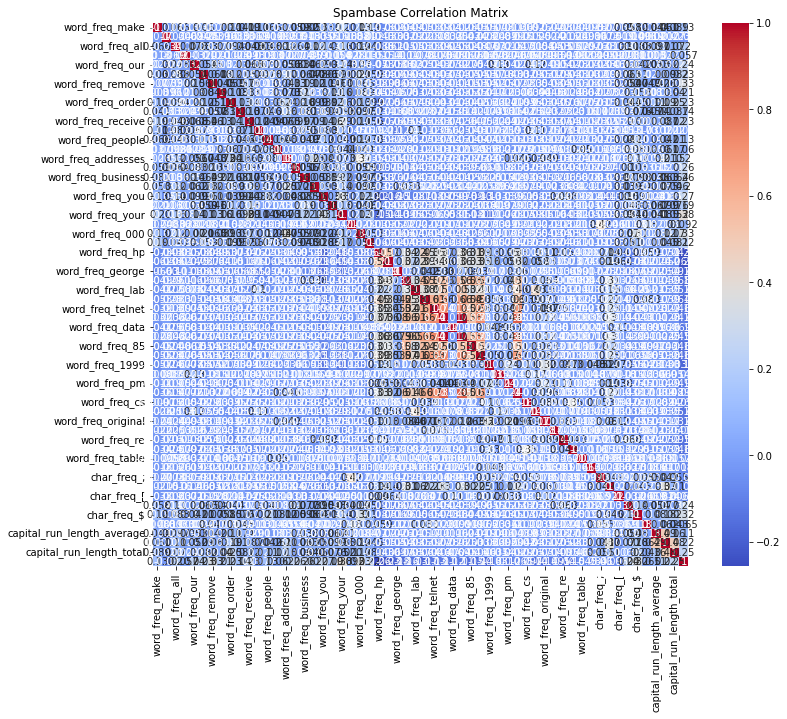

In [31]:
# Plotting correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Spambase Correlation Matrix")
plt.show()


## COMMENTS AND RECOMMENDATIONS

### Visualization Limitations

Plotting a correlation matrix with 58 columns may result in a large and crowded heatmap that can be difficult to interpret. You might consider reducing the number of columns or using alternative visualization techniques to gain insights into the data.

### Feature Selection
Instead of visualizing the entire correlation matrix, you can focus on identifying the most important features by calculating pairwise correlations with the target variable (in this case, the "spam" column). This can help you identify key features that are highly correlated with the target and might be more informative for your analysis.

### Subset or Aggregate Correlation
If the entire correlation matrix is too large to analyze effectively, you can consider selecting a subset of columns based on domain knowledge or specific hypotheses. Alternatively, you can aggregate correlated features or use dimensionality reduction techniques like Principal Component Analysis (PCA) to capture the most important information from the dataset.

## Subset Correlation

Select a subset of columns by specifying their names in the subset_cols list. Then, create a new DataFrame with only those columns (subset_data). Calculate the correlation matrix (subset_corr_matrix) and plot it as a heatmap using seaborn's heatmap function.



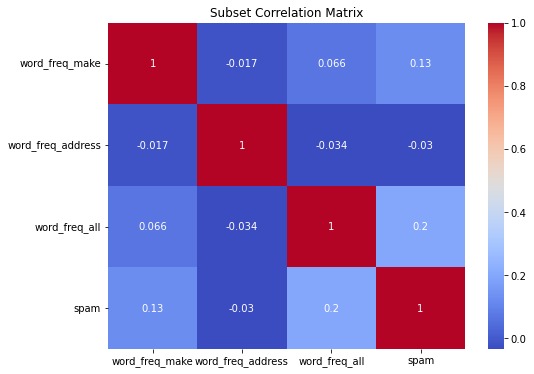

In [32]:
# Select a subset of columns
subset_cols = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'spam']
subset_data = data[subset_cols]

# Calculate the correlation matrix for the subset data
subset_corr_matrix = subset_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(subset_corr_matrix, annot=True, cmap="coolwarm")
plt.title("Subset Correlation Matrix")
plt.show()

## Aggregate Correlation

Create a new DataFrame (aggregated_data) by aggregating multiple columns based on your desired logic. In this example, we calculate the mean value of columns with names containing 'word_freq', 'char_freq', and 'capital_run_length'. Calculate the correlation matrix for the aggregated data (aggregated_corr_matrix) and plot it as a heatmap.

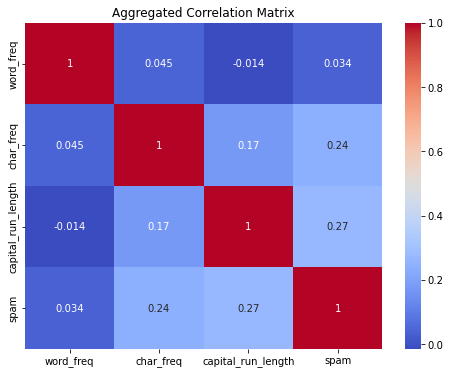

In [33]:
# Aggregate multiple columns
aggregated_data = pd.DataFrame()
aggregated_data['word_freq'] = data.filter(like='word_freq').mean(axis=1)
aggregated_data['char_freq'] = data.filter(like='char_freq').mean(axis=1)
aggregated_data['capital_run_length'] = data.filter(like='capital_run_length').mean(axis=1)
aggregated_data['spam'] = data['spam']

# Calculate the correlation matrix for the aggregated data
aggregated_corr_matrix = aggregated_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(aggregated_corr_matrix, annot=True, cmap="coolwarm")
plt.title("Aggregated Correlation Matrix")
plt.show()

## SPAMBASE DATASET PREPROCEESING

Handle missing values, duplicates, outliers, or any other data quality issues


In [34]:
# Drop any duplicate rows
data.drop_duplicates(inplace=True)

# Handle missing values if any
data.dropna(inplace=True)

## NORMALIZATION


Feature scaling is used to bring all the features of a dataset onto a similar scale or range. It is a common preprocessing step in data analysis and machine learning tasks. 

In [35]:
# Step 3: Data Normalization
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data.drop('spam', axis=1))
data_normalized = pd.DataFrame(data_normalized, columns=data.columns[:-1])


## FEATURES AND LABEL SEPERATION

In [36]:
X = data_normalized  # Features
y = data['spam']  # Target variable

## TRAINING AND VALIDATION DATASET SPLITTING

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

## SVM TRAINING

**Charaetristics of SVM**

Support Vector Machines (SVM) offer several advantages that make them a popular choice in machine learning. One of their key strengths is their effectiveness in high-dimensional spaces. SVM can handle datasets with a large number of features and still provide accurate predictions. Additionally, SVM is robust to outliers, as it focuses on support vectors that contribute the most to the decision boundary. The versatility of kernel functions is another advantage of SVM, allowing for capturing complex relationships in the data. SVM aims to find the global optimum solution by minimizing the margin and maximizing the separation between classes. Moreover, SVM performs well with small to medium-sized datasets, where the number of samples is less than the number of features.

However, SVM also has some limitations. First, SVM can be computationally intensive, particularly with large datasets, as it involves solving a quadratic optimization problem. Additionally, SVM is sensitive to noise, and outliers or mislabeled samples can significantly impact the decision boundary. Selecting the appropriate kernel function and tuning the kernel parameters can be challenging, and the performance of SVM is highly dependent on these choices.

In [38]:
# SVM Training
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

**why given Hyperprameters are used ?**

**Kernel parameter is selected as 'linear'**
A linear kernel is used for the SVM model. This kernel assumes a linear decision boundary, which can be effective for datasets with a large number of features. It is a good starting point for high-dimensional data and can provide good performance when the data is linearly separable.

**targetted c value is 1.0**
The C parameter determines the regularization strength. A smaller C value imposes a stronger regularization, while a larger C value allows for more complex decision boundaries. A value of 1.0 is a common default value and can provide a balanced regularization effect.

In [39]:
svm_history = svm_model.fit(X_train, y_train)

## SVM DECISION FUCNTION VALUE

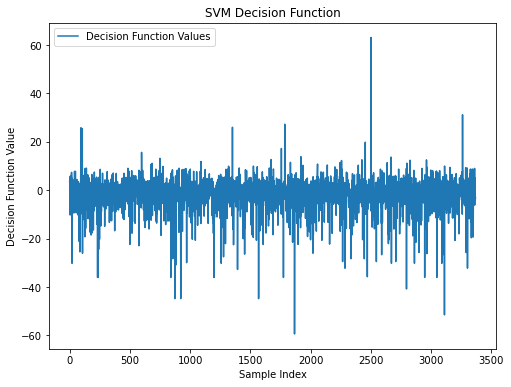

In [55]:
# Step 3: SVM Visualization
plt.figure(figsize=(8, 6))
decision_values = svm_model.decision_function(X_train)
plt.plot(decision_values, label='Decision Function Values')
plt.title("SVM Decision Function")
plt.xlabel("Sample Index")
plt.ylabel("Decision Function Value")
plt.legend()
plt.show()

## SVM EVALUATION

In [57]:
# SVM Evaluation
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)


## ENSEMBLE GRADIENT BOASTING CLASSIFIER TRAINING

**Characteristics of Random forest**

Random Forest has its own set of advantages. Random Forest models are robust against overfitting, thanks to the ensemble of multiple trees. They can handle high-dimensional data without the need for feature selection or dimensionality reduction techniques. Random Forest is effective for both classification and regression tasks, providing accurate predictions in various problem domains. Moreover, Random Forest models offer a measure of feature importance, enabling the identification of influential variables in the prediction process. They can also handle missing data and outliers by imputing missing values and mitigating the impact of outliers through averaging across multiple trees.

However, Random Forest also has some drawbacks. The interpretability of Random Forest models is relatively low compared to simpler models like decision trees, making it challenging to understand the underlying decision-making process. Random Forest models require more memory to store multiple trees, especially with a large number of estimators or trees in the ensemble. Training a Random Forest model can also take longer compared to simpler models, especially when the number of trees or features is large. Additionally, Random Forest may exhibit a bias towards features with a higher number of levels or categories, potentially biasing the importance ranking.

In [53]:
ensemble_model = RandomForestClassifier(n_estimators=160, random_state=42)


**Why Random Forest Classifier is used?**

Random Forest models are popular ensemble methods that build an ensemble of weak learners (decision trees) in a sequential manner, optimizing a loss function at each iteration. These models can handle high-dimensional data well and often provide excellent predictive performance.

**why n_estimators is selected as 160 ?**

The number of estimators determines the number of decision trees in the Random Forest ensemble. More trees can help improve the model's performance, but there is a trade-off between computation time and accuracy. The choice of 160 is somewhat arbitrary, and it's recommended to experiment with different values based on your specific dataset and computational resources.


In [54]:
ensemble_history = ensemble_model.fit(X_train, y_train)

## RANDOM FOREST EVALUATION

In [58]:
# Ensemble Model Evaluation
ensemble_predictions = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_classification_report = classification_report(y_test, ensemble_predictions)
ensemble_confusion_matrix = confusion_matrix(y_test, ensemble_predictions)

## RESULTS AND COMPARSION

In [60]:

# Define evaluation metrics for SVM model
svm_metrics = [
    ["Accuracy", svm_accuracy],
    ["Classification Report", svm_classification_report],
    ["Confusion Matrix", svm_confusion_matrix],
]

# Define evaluation metrics for Ensemble model
ensemble_metrics = [
    ["Accuracy", ensemble_accuracy],
    ["Classification Report", ensemble_classification_report],
    ["Confusion Matrix", ensemble_confusion_matrix],
]

# Print evaluation metrics in a table format
print("SVM Model Evaluation:")
print(tabulate(svm_metrics, headers=["Metric", "Value"], tablefmt="grid"))
print()

print("Ensemble Model Evaluation:")
print(tabulate(ensemble_metrics, headers=["Metric", "Value"], tablefmt="grid"))


SVM Model Evaluation:
+-----------------------+-------------------------------------------------------+
| Metric                | Value                                                 |
+=======================+=======================================================+
| Accuracy              | 0.9228028503562945                                    |
+-----------------------+-------------------------------------------------------+
| Classification Report | precision    recall  f1-score   support               |
|                       |                                                       |
|                       |            0       0.93      0.95      0.94       501 |
|                       |            1       0.92      0.89      0.90       341 |
|                       |                                                       |
|                       |     accuracy                           0.92       842 |
|                       |    macro avg       0.92      0.92      0.92       

## CONCLUSION

### Accuracy:
**SVM Model** The SVM model achieved an accuracy of 92.28%.

**Ensemble Model** The Ensemble model achieved a slightly higher accuracy of 93.82%.

### Classification Report:

**Precision** Both models have high precision values, indicating their ability to correctly classify spam and non-spam emails.

**Recall** Both models have good recall scores, indicating their ability to correctly identify positive instances (spam emails) among all positive instances.

**F1-Score** Both models have high F1-scores, which is a harmonic mean of precision and recall. It shows a balanced performance in terms of precision and recall.

**Support** The number of instances in each class used for evaluation.

### Confusion Matrix:

**SVM Model**
The SVM model correctly classified 474 instances as non-spam (true negatives) and 303 instances as spam (true positives). It misclassified 27 instances as spam (false positives) and 38 instances as non-spam (false negatives).

**Ensemble Model** The Ensemble model correctly classified 476 instances as non-spam (true negatives) and 314 instances as spam (true positives). It misclassified 25 instances as spam (false positives) and 27 instances as non-spam (false negatives).

Based on these evaluation results, both models perform well in terms of accuracy, precision, recall, and F1-score. The Ensemble model slightly outperforms the SVM model in terms of accuracy.